<a href="https://colab.research.google.com/github/wellingtonsouza32/datascience_materialestudo/blob/main/Explorando_com_Seaborn_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importando base de dados

In [5]:
import pandas as pd
dados = pd.read_csv('/content/drive/MyDrive/Data_Visualization/tips.csv')

In [6]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


#Tradução

In [7]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [8]:
renomear = {'total_bill':'valor_da_conta', 'tip':'gorjeta', 'dessert':'sobremesa', 'day': 'dia_da_semana', 'time':'hora_do_dia', 'size':'total_de_pessoas'}

In [9]:
type(dados)

pandas.core.frame.DataFrame

In [10]:
gorjetas = dados.rename(columns = renomear)

In [11]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [12]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [13]:
sim_nao = {
    'No':'não', 'Yes':'sim'
}

In [14]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [15]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,não,Sun,Dinner,2


In [16]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [17]:
dias = {'Sun':'Domingo', 'Sat':'Sábado', 'Thur':'Quinta', 'Fri':'Sexta'}

In [18]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [19]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,não,Domingo,Dinner,2


In [20]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [21]:
hora = {'Dinner':'Jantar',
        'Lunch' : 'Almoço'}

In [22]:
gorjetas.hora_do_dia =gorjetas.hora_do_dia.map(hora)

In [23]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,não,Domingo,Jantar,2


#Importando o Seaborn

In [24]:
!pip install seaborn==0.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
import seaborn as sns

In [26]:
!pip show seaborn

Name: seaborn
Version: 0.9.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, pandas, matplotlib, scipy
Required-by: missingno


#Análise 1 - Valor da conta e gorjeta

In [27]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

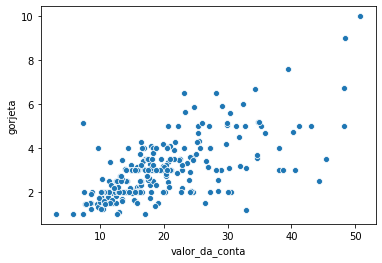

In [30]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)

**Visualmente o valor da gorjeta aumenta conforme aumenta o valor da conta**

In [32]:
print('A base de dados contém {} registros \n'.format(gorjetas.shape[0]))
print('Registros não nulos')
gorjetas.count()

A base de dados contém 244 registros 

Registros não nulos


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

##Criando o campo porcentagem##

In [33]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,não,Domingo,Jantar,2


In [34]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']

In [35]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,não,Domingo,Jantar,2,0.059447
1,10.34,1.66,não,Domingo,Jantar,3,0.160542
2,21.01,3.50,não,Domingo,Jantar,3,0.166587
3,23.68,3.31,não,Domingo,Jantar,2,0.139780
4,24.59,3.61,não,Domingo,Jantar,4,0.146808


In [36]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [37]:
gorjetas.head(3)


,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,não,Domingo,Jantar,2,0.06
1,10.34,1.66,não,Domingo,Jantar,3,0.16
2,21.01,3.50,não,Domingo,Jantar,3,0.17


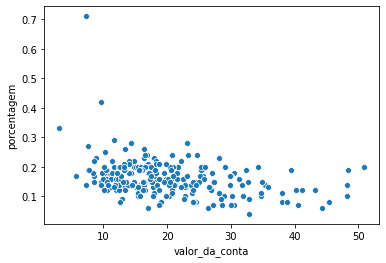

In [38]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

**visualmente parece que o valor da conta não é proporcional ao valor da gorjeta**

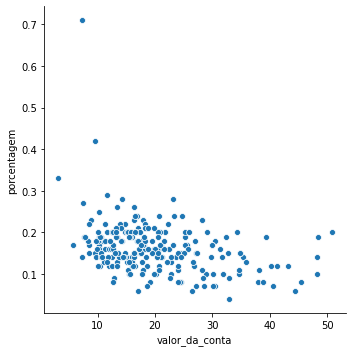

In [39]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

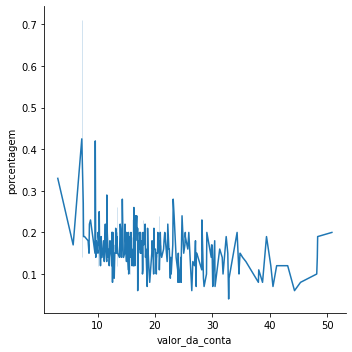

In [40]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)

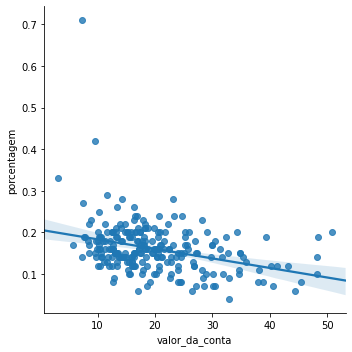

In [41]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

#Análise 2 Sobremesa

In [43]:
gorjetas[gorjetas.sobremesa == 'sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [44]:
gorjetas[gorjetas.sobremesa == 'não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


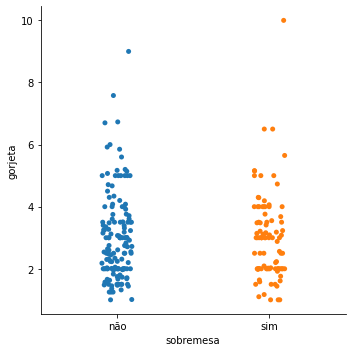

In [45]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

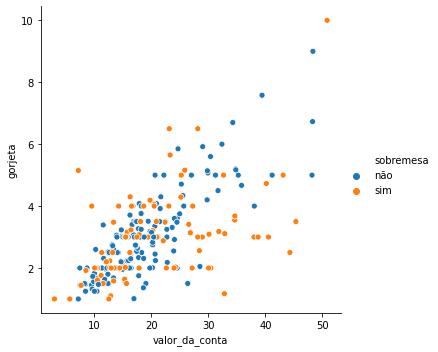

In [46]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

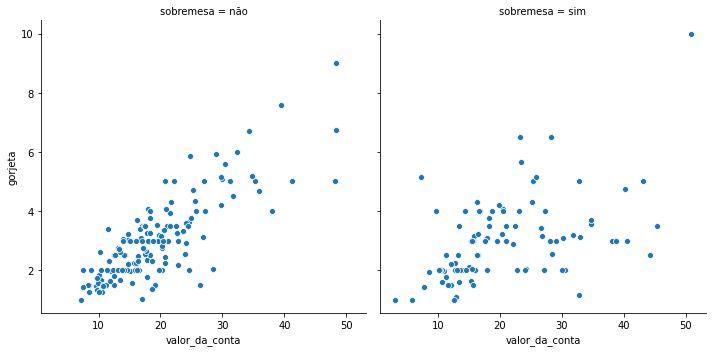

In [47]:
sns.relplot(x='valor_da_conta', y='gorjeta', col='sobremesa', data=gorjetas)

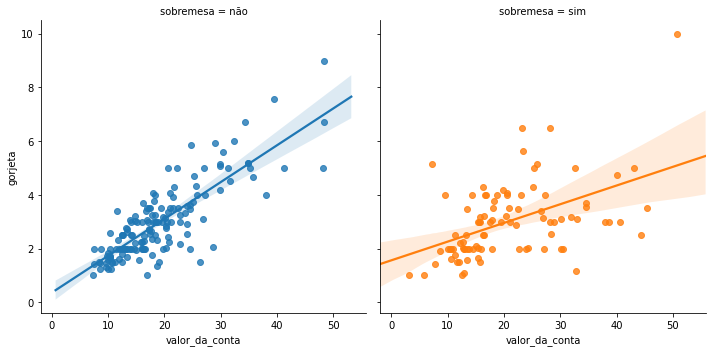

In [48]:
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

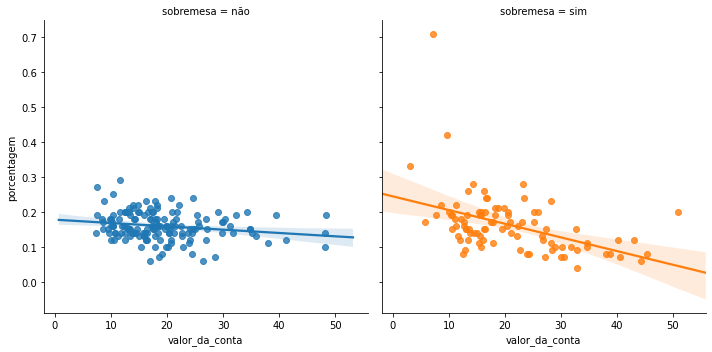

In [49]:
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)

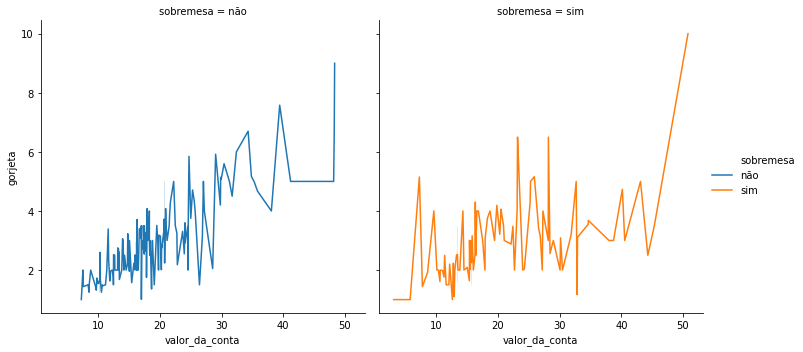

In [51]:
sns.relplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', kind='line', data=gorjetas)

**Visualmente existe um diferença no valor da Gorjeta daqueles que pediram sobremesa e não pediram**